<a href="https://colab.research.google.com/github/khushpatel2002/Machine_Learning/blob/main/Titanic_dataset_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from os import link
import pandas as pd
 

In [37]:
train = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/train.csv'
test = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/test.csv'
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [38]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [41]:
test_data["AgeBucket"] = test_data["Age"] // 15 * 15
test_data[["AgeBucket"]].groupby(['AgeBucket']).mean()

test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]
test_data[["RelativesOnboard"]].groupby(['RelativesOnboard']).mean()

""
RelativesOnboard
0
1
2
3
4
5
6
7
10


In [24]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'AgeBucket', 'RelativesOnboard'],
      dtype='object')

In [42]:
train_data = train_data.drop(["SibSp", "Parch", "Age"], axis = 1)
test_data = test_data.drop(["SibSp", "Parch", "Age"], axis = 1)

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Ticket            891 non-null    object 
 5   Fare              891 non-null    float64
 6   Cabin             204 non-null    object 
 7   Embarked          889 non-null    object 
 8   AgeBucket         714 non-null    float64
 9   RelativesOnboard  891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("inputer", SimpleImputer(strategy="most_frequent")),
    ("car_encoder", OneHotEncoder(sparse=False)),
])

In [46]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'AgeBucket', 'RelativesOnboard'],
      dtype='object')

In [47]:
from sklearn.compose import ColumnTransformer

num_attribs = ["AgeBucket", "RelativesOnboard", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocessing_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [48]:
X_train = preprocessing_pipeline.fit_transform(
    train_data[num_attribs+cat_attribs])

X_train

array([[-0.49336646,  0.05915988, -0.50244517, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62234298,  0.05915988,  0.78684529, ...,  1.        ,
         0.        ,  0.        ],
       [-0.49336646, -0.56097483, -0.48885426, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49336646,  1.29942929, -0.17626324, ...,  0.        ,
         0.        ,  1.        ],
       [-0.49336646, -0.56097483, -0.04438104, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.62234298, -0.56097483, -0.49237783, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
y_train = train_data["Survived"]

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
X_test = preprocessing_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [52]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8148564294631709

In [53]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8204369538077403

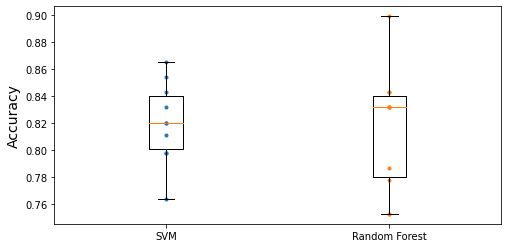

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()